#### 缺失值处理

In [11]:
# 创建数据示例(comma-separated values, CSV)并进行缺失值识别.
import pandas as pd
import numpy as np
from io  import StringIO

csv_data = \
    '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [12]:
# 缺失值识别统计.
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [13]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

#### 剔除缺失值

In [14]:
# 删除具有缺失值的样本行或者列.
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [15]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [16]:
# 关于dropna方法的一些参数设置.
"""
仅删除所有行或列取值均为NaN的数据;
"""
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [17]:
# 设置缺失数据删除阈值.
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [18]:
# 如果某行中，该特征列包含有缺失值，则删除该行， 通过subset制定列名.
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


如上所述，直接删除缺失值会很方便快捷，但缺点也是明显的；对应损失了大量的样本或特征，则面临重要数据信息丢失的风险。

#### 缺失值填充

在直接删除缺失值之外，缺失值填充也应用广泛，其避免了大量数据信息丢失的风险。实现此目的的便捷方法是使用sklearn中的SimpleImputer类。示例代码如下：

In [19]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [21]:
# 或者可以直接使用DataFrame的fillna方法.
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


#### Scikit-learn estimator API.

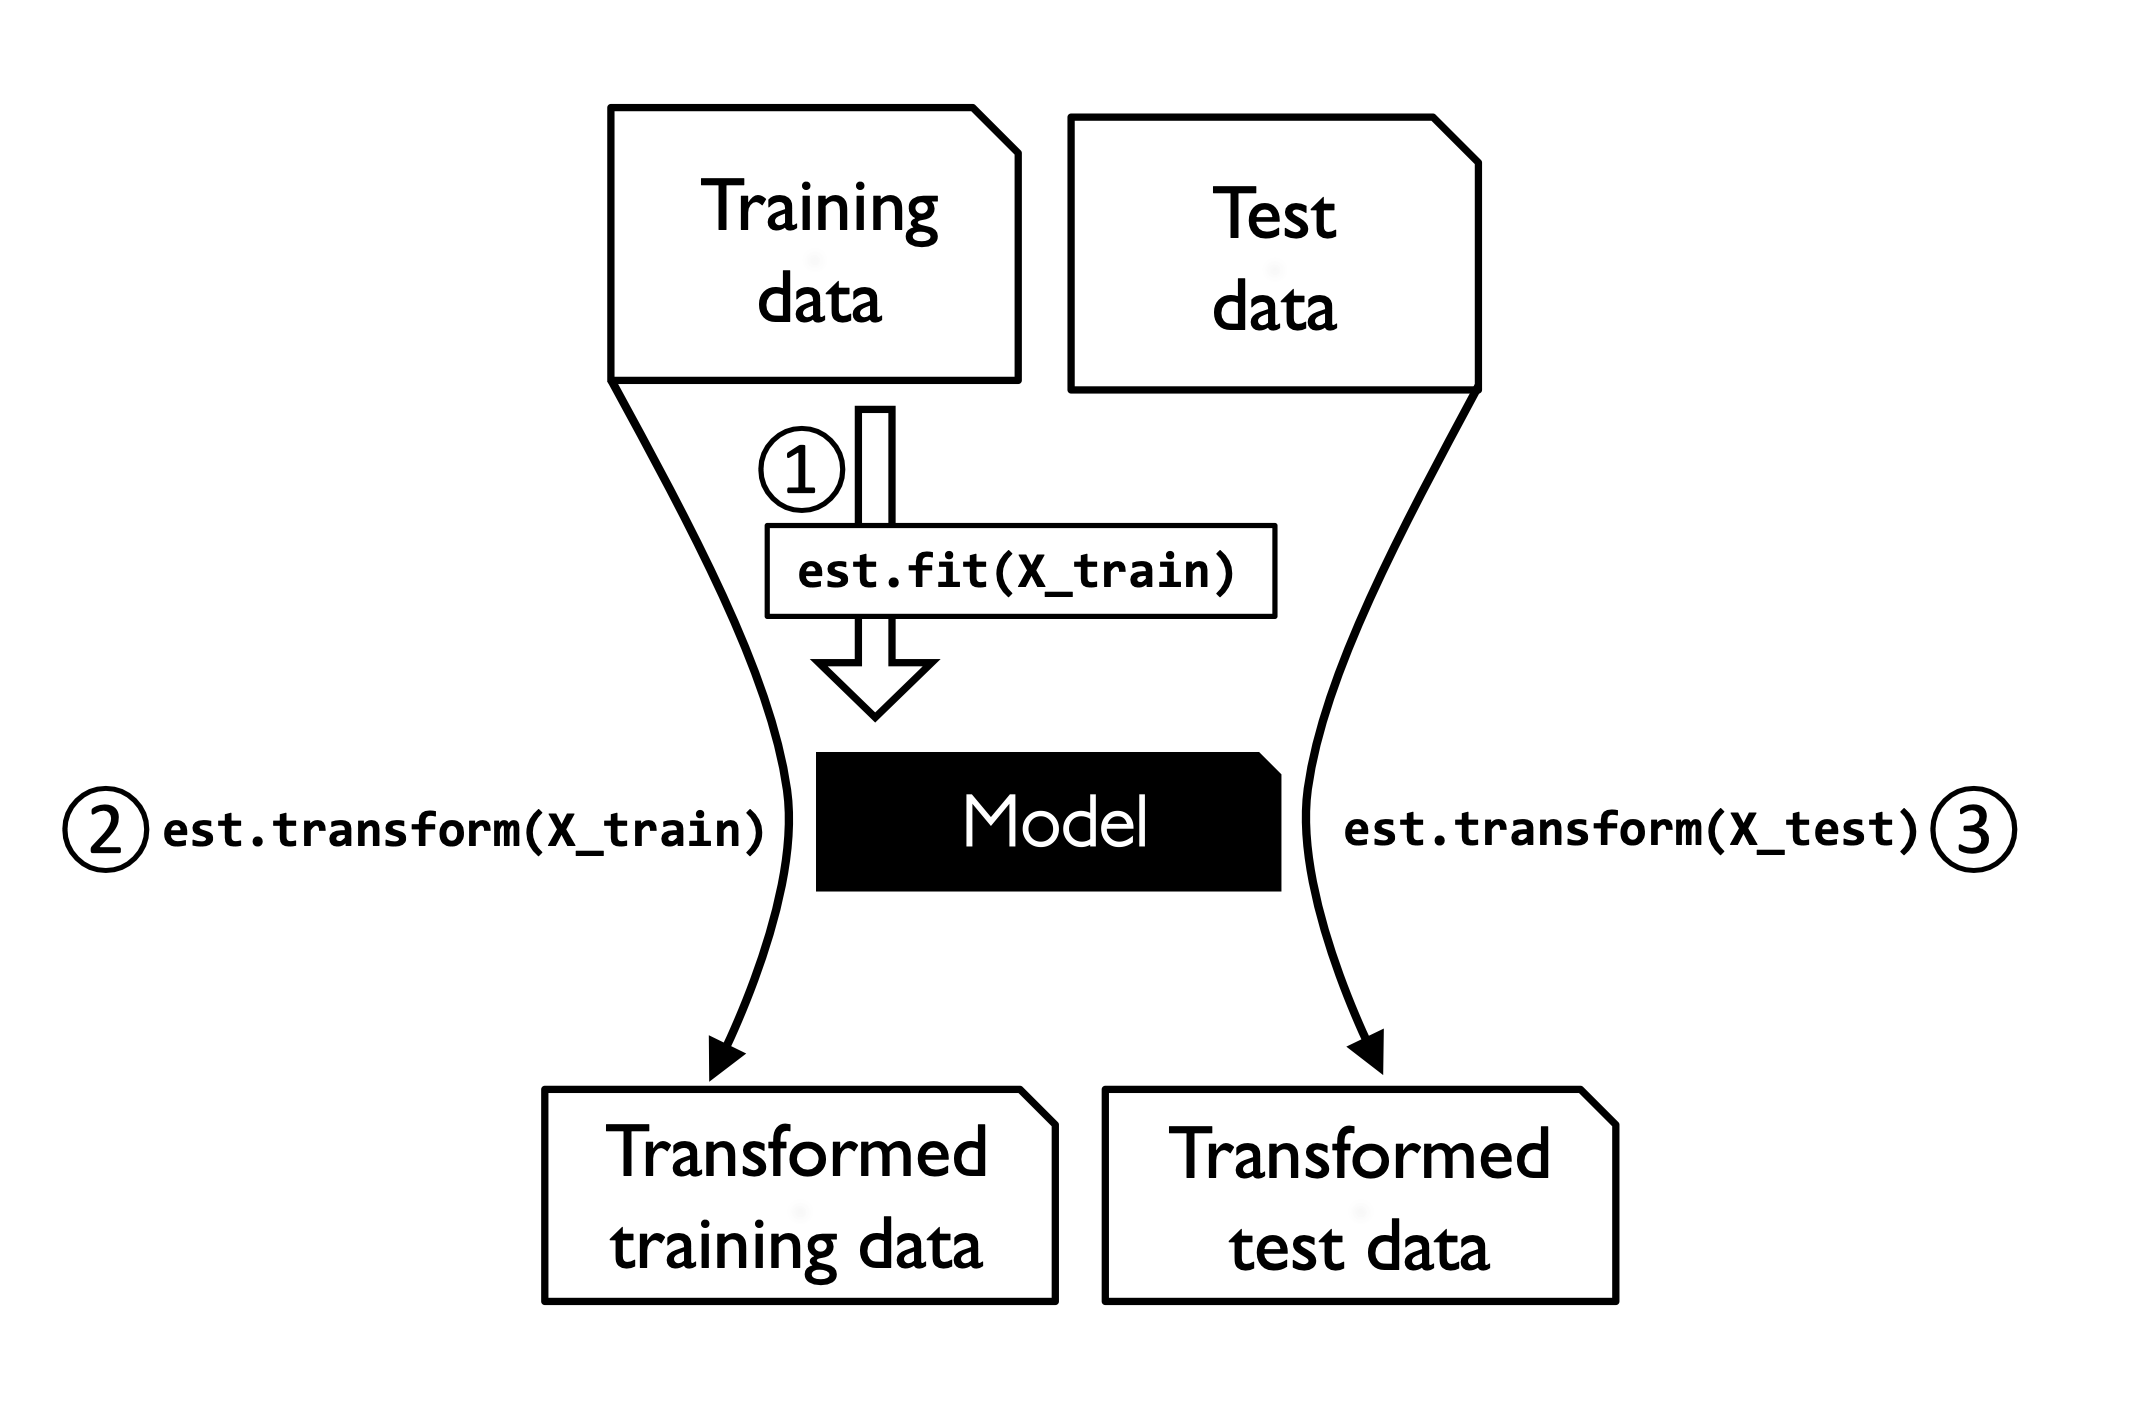

In [28]:
"""
    下图说明了在训练数据上fitted之后的Transformer是怎样对训练
    数据集进行转换并应用于新的测试集的。
"""

from IPython.display import Image
Image(filename='../Python-MachineLearning/Attached_images/Chapter4/figures/04_02.png', 
      width=450)

与之类似的,在前面章节中使用到的classifier属于sklearn中的estimators。它的调用过程如下：

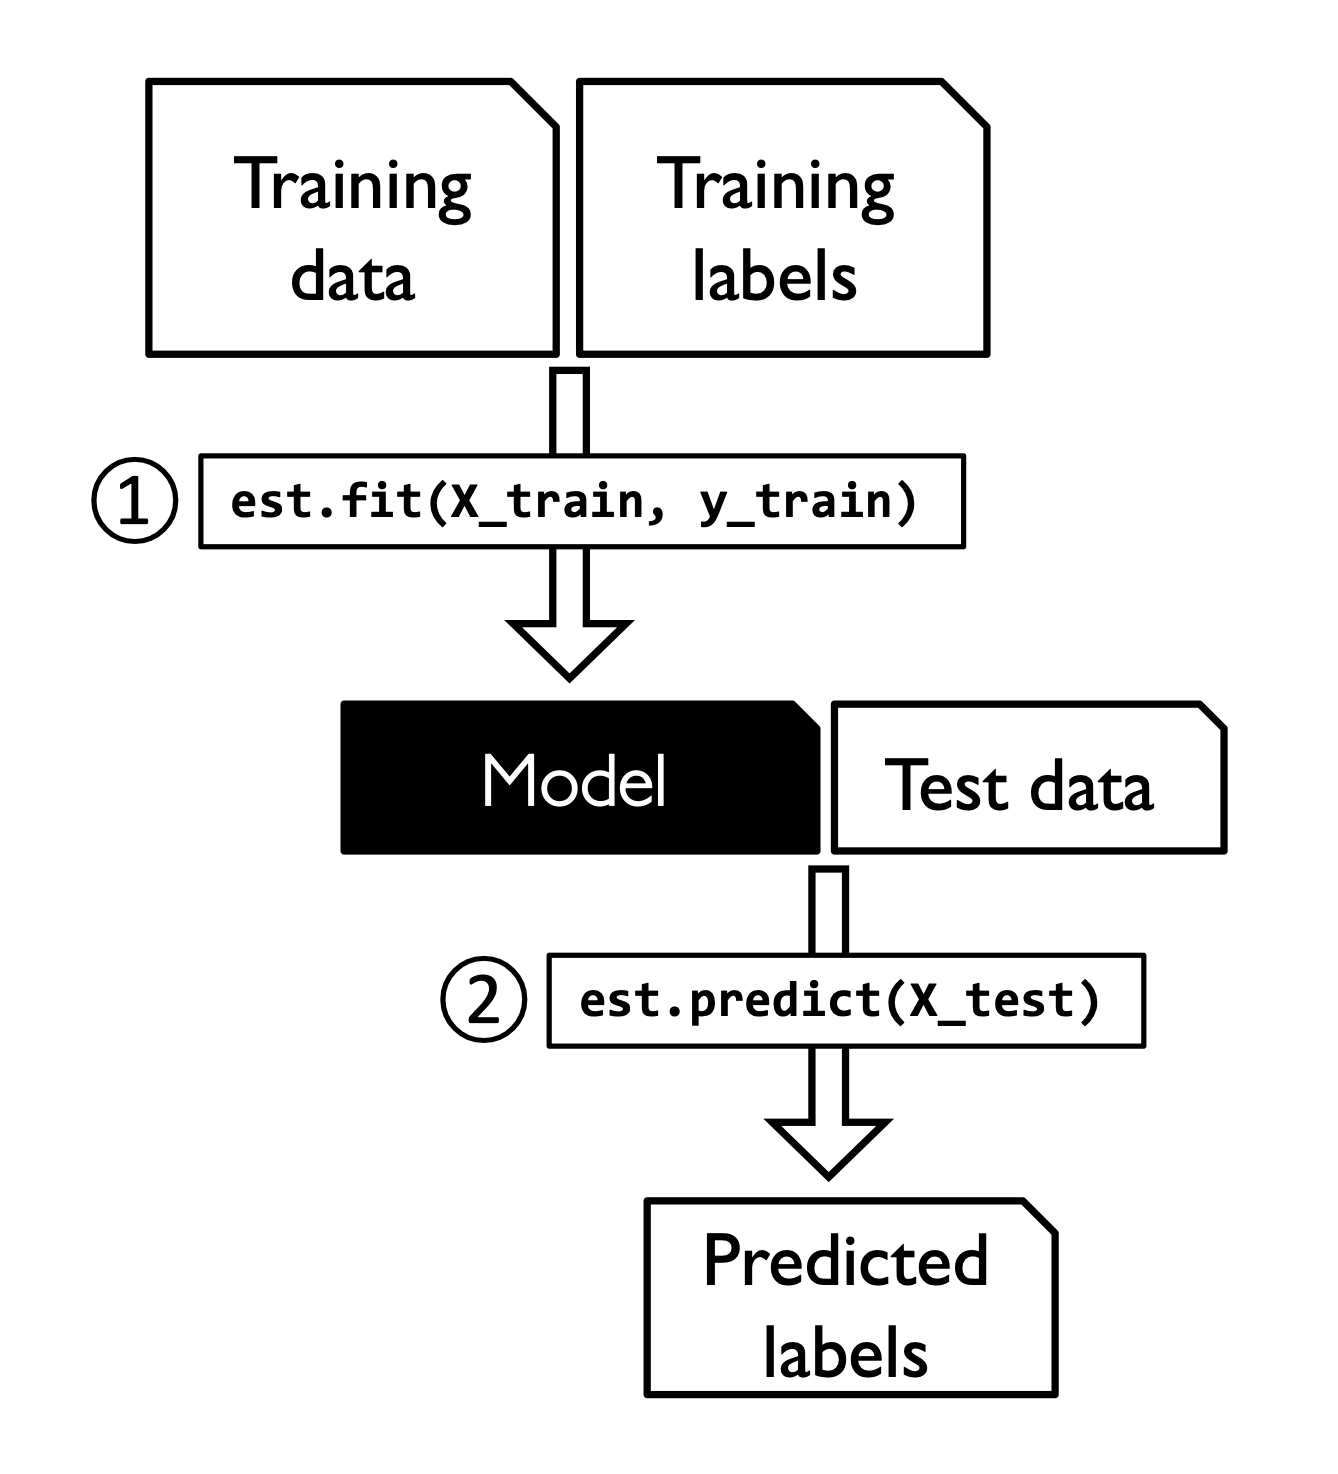

In [29]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter4/figures/04_03.png', 
      width=450)

#### 处理类别型数据

* Ordinal feature: 可以理解为排列或排序的类别型特征，如T恤尺寸，XL>L>M;
* Nominal feature: 名义特征并不意味着任何顺序，如T恤颜色等。

In [30]:
# 创建示例数据.
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   color       3 non-null      object 
 1   size        3 non-null      object 
 2   price       3 non-null      float64
 3   classlabel  3 non-null      object 
dtypes: float64(1), object(3)
memory usage: 224.0+ bytes


如上所示，'color', 'size',  'classlabel'这些列取值都是字符串类型。其中，'color'是nominal 特征；'size'是ordinal 特征。

#### 顺序特征映射

为了确保学习算法可以正确解释有序特征，需要将对应的字符串特征值转换为整数。但目前没有方便的函数可以自动推导处上述数据中'size'特征的取值顺序。因此可以手动定义映射字典：

In [32]:
size_mapping = {'XL': 3, 
                'L': 2, 
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df


,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [33]:
# 上述特征映射过程的还原.
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

#### 类标签编码

In [35]:
# 需要注意的是, 类标签不是有序的.
import numpy as np

class_mapping = {label: idx for idx , label in 
                 enumerate(np.unique(df['classlabel']))}

class_mapping

{'class1': 0, 'class2': 1}

In [36]:
# 执行类标签映射变换.
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [37]:
# 上述映射过程的还原.
inv_class_mapping = {v: k for k, v in class_mapping.items()}

df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [38]:
# 利用sklearn中提供的LabelEncoder.
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [39]:
# 可以使用inverse_transform来进行逆变换.
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

#### 对nominal特征进行one-hot

In [40]:
"""
    上面已经提到,sklearn的estimator's将类别标签视为不包含任何顺序的类别数据，因此可以直接使用
    LabelEncoder将字符串类型的特征值编码为整数.代码如下：
"""
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()

X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [41]:
"""
这样一来的话，得到如下结果：
green: 1 

red: 2

blue: 0

所以问题也很明显，尽管原始颜色特征值不含有任何顺序，但分类器会误认为顺序关系的存在. 因此，一种更科学的方法是使用
one-hot-encoding。代码实现如下：
"""
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values

color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [43]:
"""
    在上述代码中，仅将OneHotEncoder应用在单个列上; 如果想选择性地转换多个特征列，可以使用ColumnTransformer类，
    它接受(名称、transformer、列),代码示例如下：
"""
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]), 
    ('nothing', 'passthrough', [1, 2])
])

c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

在上述代码中，通过'passthrough'参数指定修改第0列，忽略其他两列。另外一种便利的方法是使用'get_dummies'方法。代码如下：

In [44]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


`需要注意的是`，当使用one-hot编码进行数据处理时，会引入多重共线性(multi-collinearity)。这对于某些方法(涉及到矩阵求逆)，可能存在问题。如果特征高度相关，则矩阵在计算上难以求逆，以至导致数值的不稳定估计。

`为了解决这种问题`，可以直接从独热编码数组中删除一个特征列，而不会丢失任何重要信息。例如删除列'color_blue'：

In [45]:
# 当使用get_dummies函数时，可以通过drop_first参数指定删除第一列.
pd.get_dummies(df[['price', 'color', 'size']], 
               drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [46]:
# 当使用OneHotEncoder，且需要删除第一列时，可以通过drop参数进行设置.
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([('onehot', color_ohe, [0]), 
                              ('nothing', 'passthrough', [1, 2])])

c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

#### 对有序特征编码的一种可选方法

如果在实践中，不确定有序特征类别之间的数值差异，或者没有定义两个有序值之间的差异。则可以 0/1的阈值编码方法。

例如：可以将M、L、XL的特征拆分为两个新特征，分别为x>M和x>L。代码实现如下：

In [47]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [48]:
# 结合apply和lambda表达式.
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)

df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


#### 训练集和测试集划分